In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [0]:
data = pd.read_csv("drive/My Drive/JS_peaks1_5.csv", index_col= "DateTime")
data.index = pd.to_datetime(data.index)

In [0]:
df = data.drop(["high","low","open","volume"],axis=1).copy()
# df = pd.read_csv("FullFeature_JustDialOneMin.csv",index_col="DateTime")
# df.index = pd.to_datetime(df.index)

In [0]:
df.shape

(425579, 26)

In [0]:
df.peaks.replace(-1,2,inplace=True)

In [0]:
buy = 0
sell = 0
idle = 0
look_back = 6
imagesX = []
imagesY = []
dfX = df.drop("peaks",axis=1).values
peaks = df.peaks.values
for i in range(look_back,len(dfX)):
  if(peaks[i] == 1):
    # imagesX.append(dfX[i-look_back:i+1])
    imagesX.append(np.concatenate((dfX[i-6],dfX[i-5],dfX[i-4],dfX[i-3],dfX[i-2],dfX[i-1],dfX[i])))
    imagesY.append(peaks[i])
    sell += 1
    while(sell<=idle):
      # imagesX.append(dfX[i-look_back:i+1])
      imagesX.append(np.concatenate((dfX[i-6],dfX[i-5],dfX[i-4],dfX[i-3],dfX[i-2],dfX[i-1],dfX[i])))
      imagesY.append(peaks[i])
      sell += 1
  if(peaks[i] == 2):
    # imagesX.append(dfX[i-look_back:i+1])
    imagesX.append(np.concatenate((dfX[i-6],dfX[i-5],dfX[i-4],dfX[i-3],dfX[i-2],dfX[i-1],dfX[i])))
    imagesY.append(peaks[i])
    buy += 1
    while(buy<=idle):
      # imagesX.append(dfX[i-look_back:i+1])
      imagesX.append(np.concatenate((dfX[i-6],dfX[i-5],dfX[i-4],dfX[i-3],dfX[i-2],dfX[i-1],dfX[i])))
      imagesY.append(peaks[i])
      buy += 1
  else:
    # imagesX.append(dfX[i-look_back:i+1])
    imagesX.append(np.concatenate((dfX[i-6],dfX[i-5],dfX[i-4],dfX[i-3],dfX[i-2],dfX[i-1],dfX[i])))
    imagesY.append(peaks[i])
    idle += 1
# peek_future = 24
# df["label"] = df.close < (df.close.shift(-peek_future) ) #- (df.close*0.005))

# df.label.replace(True, 1, inplace = True)
# df.label.replace(False, 0, inplace = True)


# X = df.drop("label",axis=1).values
# y = df.label.values

# X = X[:-peek_future]
# y = y[:-peek_future]

In [0]:
# X.shape
#X = X[-31250:]
#y = y[-31250:]
print("Buy",buy)
print("Sell",sell)
print("Idle",idle)

Buy 404469
Sell 404457
Idle 404469


In [0]:
np.array(imagesX).shape

(1213395, 50)

In [0]:
size = 1210000
X = np.array(imagesX[:size])
y = np.array(imagesY[:size])

X_test1 = np.array(imagesX[size:])
y_test1 = np.array(imagesY[size:])


In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=False, random_state=116)

In [0]:
abc = AdaBoostClassifier(n_estimators=100, random_state = 0)

In [0]:
abc.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=100, random_state=0)

In [0]:
abc.score(X_train, y_train)

0.7614287190082645

In [0]:
abc.score(X_test, y_test)

0.7602231404958678

In [0]:
from joblib import dump, load

In [0]:
dump(abc, "adaboost76_6.joblib")

['adaboost76_6.joblib']

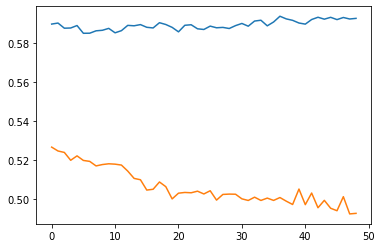

In [0]:
peek_future = 1
train_score = []
test_score = []
for peek_future in range(1,50):
  df["label"] = df.close < (df.close.shift(-peek_future) ) #- (df.close*0.005))

  df.label.replace(True, 1, inplace = True)
  df.label.replace(False, 0, inplace = True)


  X = df.drop("label",axis=1).values
  y = df.label.values

  X = X[:-peek_future]
  y = y[:-peek_future]

  #X = X[-31250:]
  #y = y[-31250:]

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, shuffle=False, random_state=42)

  abc = AdaBoostClassifier(n_estimators=100, random_state = 0)
  abc.fit(X_train, y_train)
  train_score.append(abc.score(X_train, y_train))
  test_score.append(abc.score(X_test, y_test))

plt.figure()
plt.plot(train_score,label="Train Score")
plt.plot(test_score, label="Test Score")

In [0]:
test_score

In [0]:
parameters = {"learning_rate":[0.01,0.1,0.5,1], "n_estimators" :  [10,30,50,80,100,200]}

In [0]:
abclf = AdaBoostClassifier()

In [0]:
gsclf = GridSearchCV(abclf, parameters)

In [0]:
gsclf.fit(X_train, y_train)

In [0]:
gsclf.score(X_train, y_train)

0.75390625

In [0]:
gsclf.score(X_test, y_test)

0.7093023255813954

In [0]:
pd.DataFrame(gsclf.cv_results_)

In [0]:
X.shape

(428, 286)

In [0]:
abcbest = AdaBoostClassifier(n_estimators=30, learning_rate=0.01)
abcbest.fit(X_train, y_train)
abcbest.score(X_test, y_test)

0.5450495163784944

In [0]:
sd = pd.to_datetime("2018-01-01")
ed = pd.to_datetime("2018-02-01")
sd
#df[sd:ed]

Timestamp('2018-01-01 00:00:00')

In [0]:
en